In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

## Cargamos nuestros datos

In [28]:
CURRENT_DIR = os.getcwd()  # Ruta actual de trabajo
DATA_DIR = os.path.join(CURRENT_DIR, os.pardir, "data", "CO2 Emissions_Canada.csv")

In [29]:
# Leer el archivo csv en un DataFrame de Pandas
df = pd.read_csv(DATA_DIR, delimiter=',')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Reconocimiento de datos

In [30]:
print(df.describe())

       Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456                          2.892506   
min                           4.000000         

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

## Valores faltantes

In [32]:
# valores nulos
print(df.isnull().sum())


Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


Text(0, 0.5, 'Consumo de combustible combinado (L/100 km)')

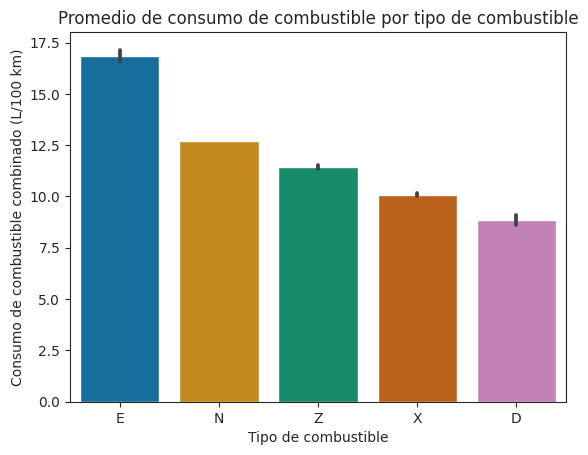

In [68]:
#Calculamos el promedio y ordenamos los datos
fuel_order = df.groupby('Fuel Type')['Fuel Consumption Comb (L/100 km)'].mean().sort_values(ascending=False).index.tolist()

# Graficando los resultados
sns.barplot(x='Fuel Type', y='Fuel Consumption Comb (L/100 km)',data=df, order=fuel_order, palette='colorblind',)

# Agregar título y etiquetas de los ejes
plt.title('Promedio de consumo de combustible por tipo de combustible')
plt.xlabel('Tipo de combustible')
plt.ylabel('Consumo de combustible combinado (L/100 km)')

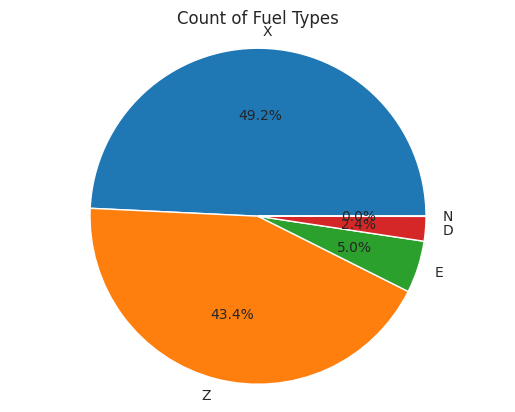

In [54]:
# Calcula el conteo de cada tipo de combustible
fuel_counts = df['Fuel Type'].value_counts()

# Crea el gráfico de pie
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%')

# Ajusta el tamaño del gráfico
plt.axis('equal')

# Añade un título
plt.title('Count of Fuel Types')

# Muestra el gráfico
plt.show()


In [55]:
fuel_counts = df['Fuel Type'].value_counts()
print(fuel_counts)


X    3637
Z    3202
E     370
D     175
N       1
Name: Fuel Type, dtype: int64


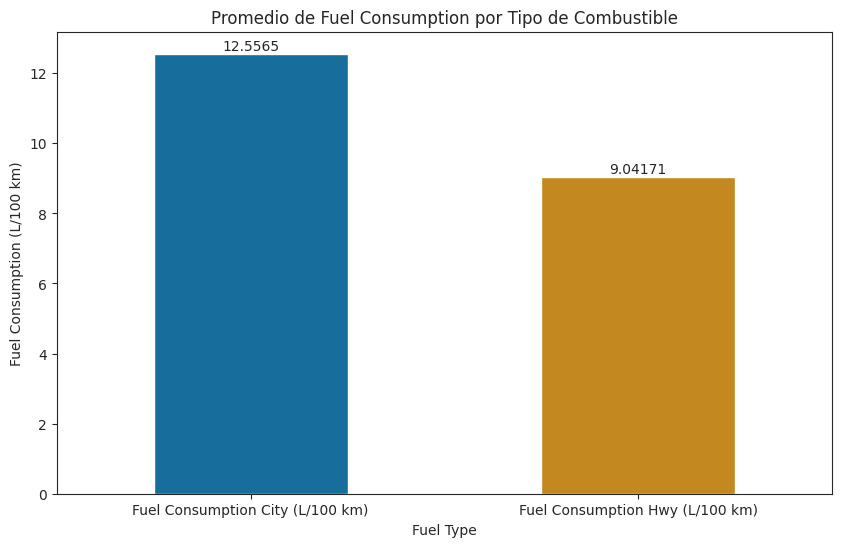

In [97]:
# Agrupar los datos por Fuel Type y calcular el promedio de Fuel Consumption City y Fuel Consumption Hwy
fuel_consumption = df.agg({'Fuel Consumption City (L/100 km)': 'mean','Fuel Consumption Hwy (L/100 km)': 'mean'})

# Crear el gráfico de barras
ax = fuel_consumption.plot(kind='bar', figsize=(10, 6), color=['#176D9C', '#C38820'])

# Añadir etiquetas de eje x, y y título
ax.set_xlabel('Fuel Type')
ax.set_ylabel('Fuel Consumption (L/100 km)')
ax.set_title('Promedio de Fuel Consumption por Tipo de Combustible')

# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Añadir etiquetas de valor sobre cada barra
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

# Mostrar el gráfico
plt.show()


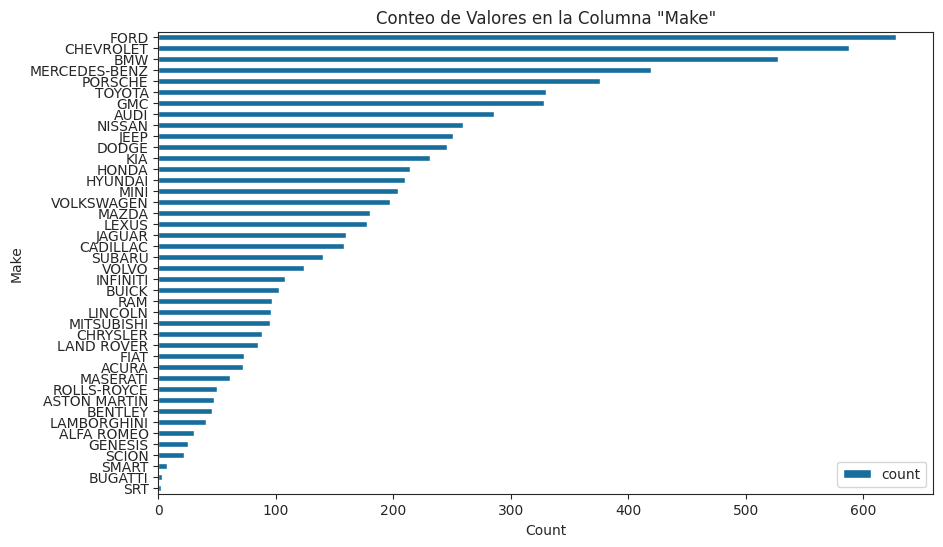

In [96]:
# Obtener la tabla de conteo de valores en la columna "Make"
make_counts = df['Make'].value_counts().reset_index()
make_counts.columns = ['Make', 'count']
make_counts = make_counts.sort_values(by='count', ascending=True)

# Crear el gráfico de barras horizontales
ax = make_counts.plot(kind='barh', x='Make', y='count', figsize=(10, 6), color='#176D9C')

# Añadir etiquetas de eje x, y y título
ax.set_xlabel('Count')
ax.set_ylabel('Make')
ax.set_title('Conteo de Valores en la Columna "Make"')

# Mostrar el gráfico
plt.show()

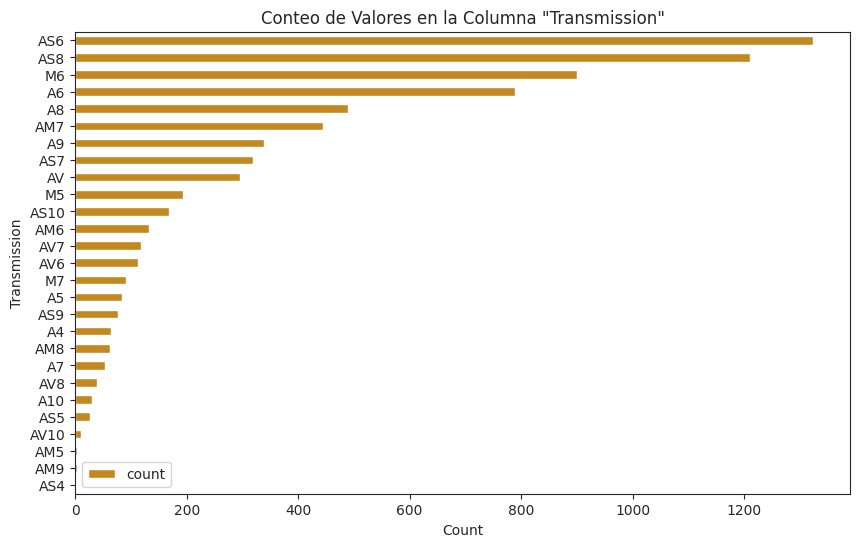

In [95]:
# Obtener la tabla de conteo de valores en la columna "Make"
Transmission_counts = df['Transmission'].value_counts().reset_index()
Transmission_counts.columns = ['Transmission', 'count']
Transmission_counts = Transmission_counts.sort_values(by='count', ascending=True)

# Crear el gráfico de barras horizontales
ax = Transmission_counts.plot(kind='barh', x='Transmission', y='count', figsize=(10, 6), color='#C38820')

# Añadir etiquetas de eje x, y y título
ax.set_xlabel('Count')
ax.set_ylabel('Transmission')
ax.set_title('Conteo de Valores en la Columna "Transmission"')

# Mostrar el gráfico
plt.show()

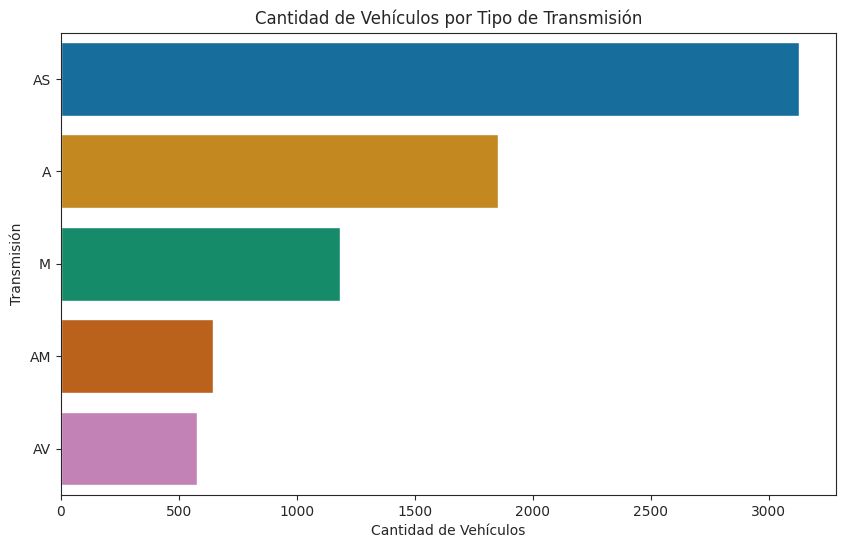

In [94]:
# Crear una nueva columna con las letras de la columna Transmission
df['Transmission_Letras'] = df['Transmission'].str.extract(r'([A-Za-z]+)', expand=False)

# Contar los valores de Transmission_Letras y ordenarlos de forma descendente
count_transmission = df['Transmission_Letras'].value_counts().sort_values(ascending=False)

# Crear el gráfico de barras horizontales utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=count_transmission.values, y=count_transmission.index, palette='colorblind')

# Añadir etiquetas de eje x, y y título
plt.xlabel('Cantidad de Vehículos')
plt.ylabel('Transmisión')
plt.title('Cantidad de Vehículos por Tipo de Transmisión')

# Mostrar el gráfico
plt.show()


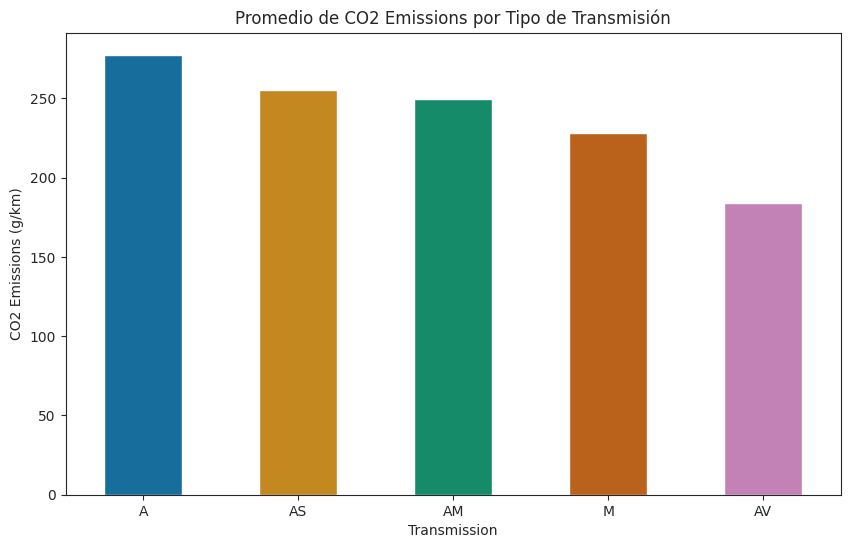

In [138]:
# Agrupar los datos por Transmission_Letras y calcular el promedio de CO2 Emissions(g/km)
emissions_by_transmission = df.groupby('Transmission_Letras')['CO2 Emissions(g/km)'].mean().reset_index()

# Ordenar los valores de manera descendente
emissions_by_transmission = emissions_by_transmission.sort_values(by='CO2 Emissions(g/km)', ascending=False)

# Crear el gráfico de barras
ax = emissions_by_transmission.plot(kind='bar', x='Transmission_Letras', y='CO2 Emissions(g/km)', figsize=(10, 6), color=['#176D9C','#C38820','#158B6A','#BA611B','#C282B5'])
     
# Añadir etiquetas de eje x, y y título
ax.set_xlabel('Transmission')
ax.set_ylabel('CO2 Emissions (g/km)')
ax.set_title('Promedio de CO2 Emissions por Tipo de Transmisión')

# Ocultar la leyenda
ax.legend().set_visible(False)

# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Mostrar el gráfico
plt.show()



In [99]:
# Agrupar los datos por Fuel Type y calcular la media de CO2 Emissions(g/km)
co2_mean = df.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean()

# Ordenar los valores de manera descendente
co2_mean = co2_mean.sort_values(ascending=False)

# Crear la tabla con los valores únicos de Fuel Type y el promedio de CO2 Emissions(g/km)
table = pd.DataFrame({'Fuel Type': co2_mean.index, 'Promedio de CO2 Emissions(g/km)': co2_mean.values})

# Mostrar la tabla
print(table)

  Fuel Type  Promedio de CO2 Emissions(g/km)
0         E                       275.091892
1         Z                       266.043410
2         D                       237.548571
3         X                       235.119329
4         N                       213.000000


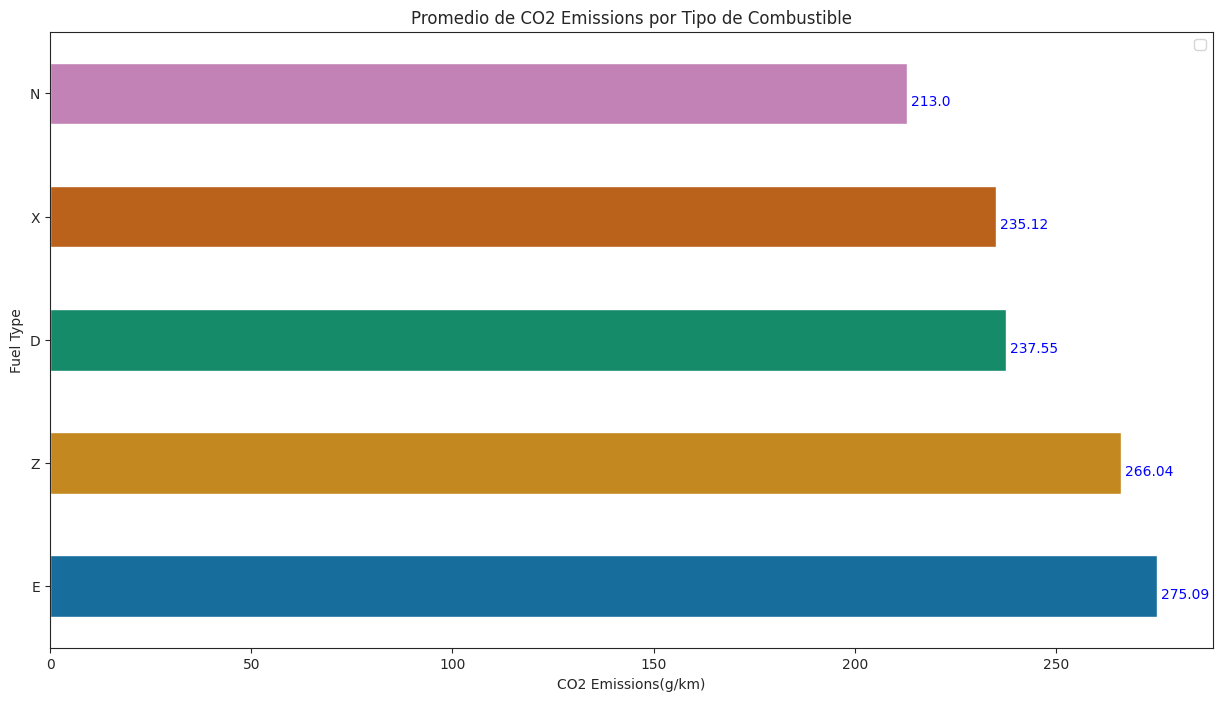

,Fuel Type,CO2 Emissions(g/km),Percentage of Max
1,E,275.091892,100.000000
4,Z,266.043410,96.710742
0,D,237.548571,86.352444
3,X,235.119329,85.469378
2,N,213.000000,77.428672


In [114]:
# Agrupar los datos por Fuel Type y calcular el promedio de CO2 Emissions
co2_emissions = df.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean().reset_index()

# Ordenar los valores de forma descendente según el promedio de CO2 Emissions
co2_emissions = co2_emissions.sort_values('CO2 Emissions(g/km)', ascending=False)

# Calcular el valor máximo de CO2 Emissions
max_value = co2_emissions['CO2 Emissions(g/km)'].max()

# Calcular el porcentaje de cada valor respecto al valor máximo
co2_emissions['Percentage of Max'] = co2_emissions['CO2 Emissions(g/km)'] / max_value * 100

# Crear el gráfico de barras
ax = co2_emissions.plot(kind='barh', x='Fuel Type', y='CO2 Emissions(g/km)', figsize=(15, 8), color=['#176D9C','#C38820','#158B6A','#BA611B','#C282B5'])

# Añadir etiquetas de eje x, y y título
ax.set_xlabel('CO2 Emissions(g/km)')
ax.set_ylabel('Fuel Type')
ax.set_title('Promedio de CO2 Emissions por Tipo de Combustible')

# Añadir los valores encima de cada barra
for i, v in enumerate(co2_emissions['CO2 Emissions(g/km)']):
    ax.text(v + 1, i - 0.1, str(round(v, 2)), color='blue')
    

# Mostrar el gráfico
ax.legend('')
plt.show()

# Mostrar la tabla con los valores únicos de Fuel Type y el promedio de CO2 Emissions, ordenados por promedio de forma descendente y con la nueva columna de porcentajes
co2_emissions


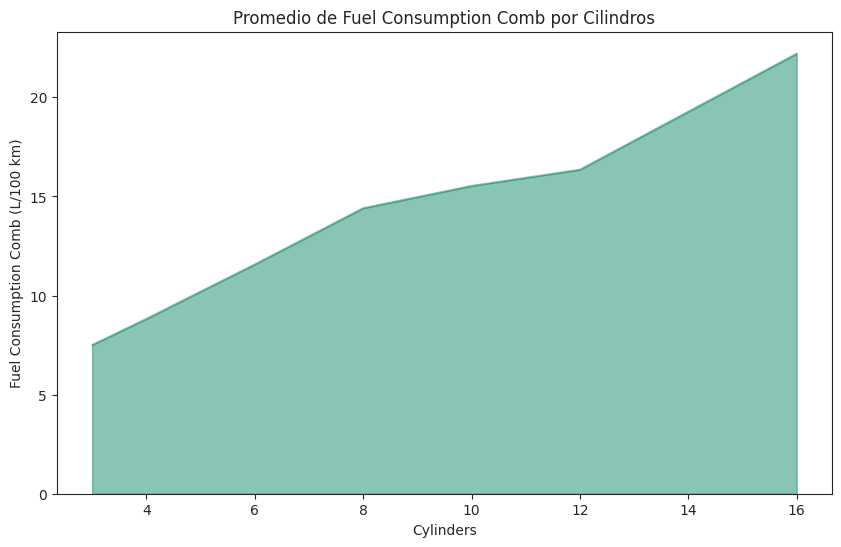

In [119]:
# Agrupar los datos por Cylinders y calcular el promedio de Fuel Consumption Comb
fuel_consumption = df.groupby('Cylinders')['Fuel Consumption Comb (L/100 km)'].mean()

# Crear el gráfico de área
ax = fuel_consumption.plot(kind='area', stacked=False, alpha=0.5, figsize=(10, 6), color='#158B6A')

# Añadir etiquetas de eje x, y y título
ax.set_xlabel('Cylinders')
ax.set_ylabel('Fuel Consumption Comb (L/100 km)')
ax.set_title('Promedio de Fuel Consumption Comb por Cilindros')

# Mostrar el gráfico
plt.show()


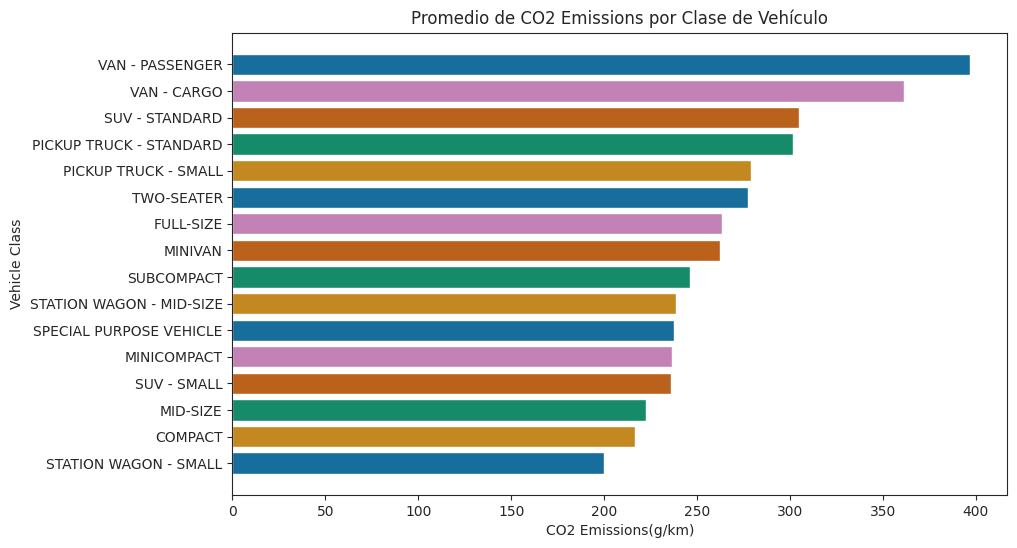

In [147]:
# Agrupar los datos por Vehicle Class y calcular el promedio de CO2 Emissions
co2_by_class = df.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean().reset_index()

# Ordenar los datos de mayor a menor según el promedio de CO2 Emissions
co2_by_class = co2_by_class.sort_values('CO2 Emissions(g/km)', ascending=True)

# Crear el gráfico de barras horizontales
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(co2_by_class['Vehicle Class'], co2_by_class['CO2 Emissions(g/km)'], color=['#176D9C','#C38820','#158B6A','#BA611B','#C282B5'])

# Añadir etiquetas de eje x, y y título
ax.set_xlabel('CO2 Emissions(g/km)')
ax.set_ylabel('Vehicle Class')
ax.set_title('Promedio de CO2 Emissions por Clase de Vehículo')

# Mostrar el gráfico
plt.show()
